[https://www.kaggle.com/competitions/digit-recognizer/data?select=sample_submission.csv]

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
sns.set(style='white', context='notebook', palette="hls")
# sns.color_palette("hls", 8)

In [32]:
train = pd.read_csv("train.csv")
target = "label"
features = train.columns[train.columns != target]

In [33]:
x_train = train[features]
y_train = train[target]
del train 

y_train.value_counts().sort_index()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

/tmp/ipykernel_3065415/563962283.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="hls")


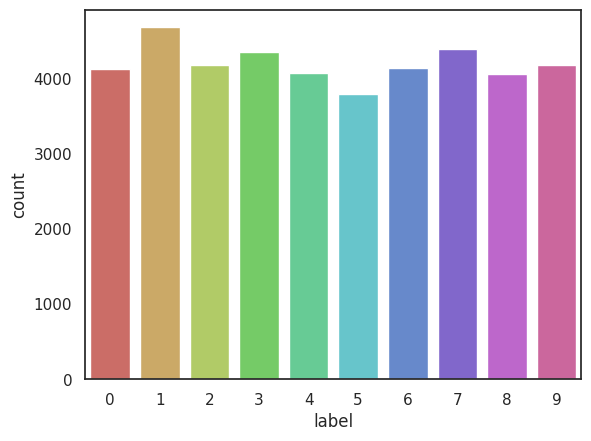

In [34]:
sns.countplot(x=y_train, palette="hls")
plt.show()

In [35]:
x_train.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [36]:
y_train.isna().any()

False

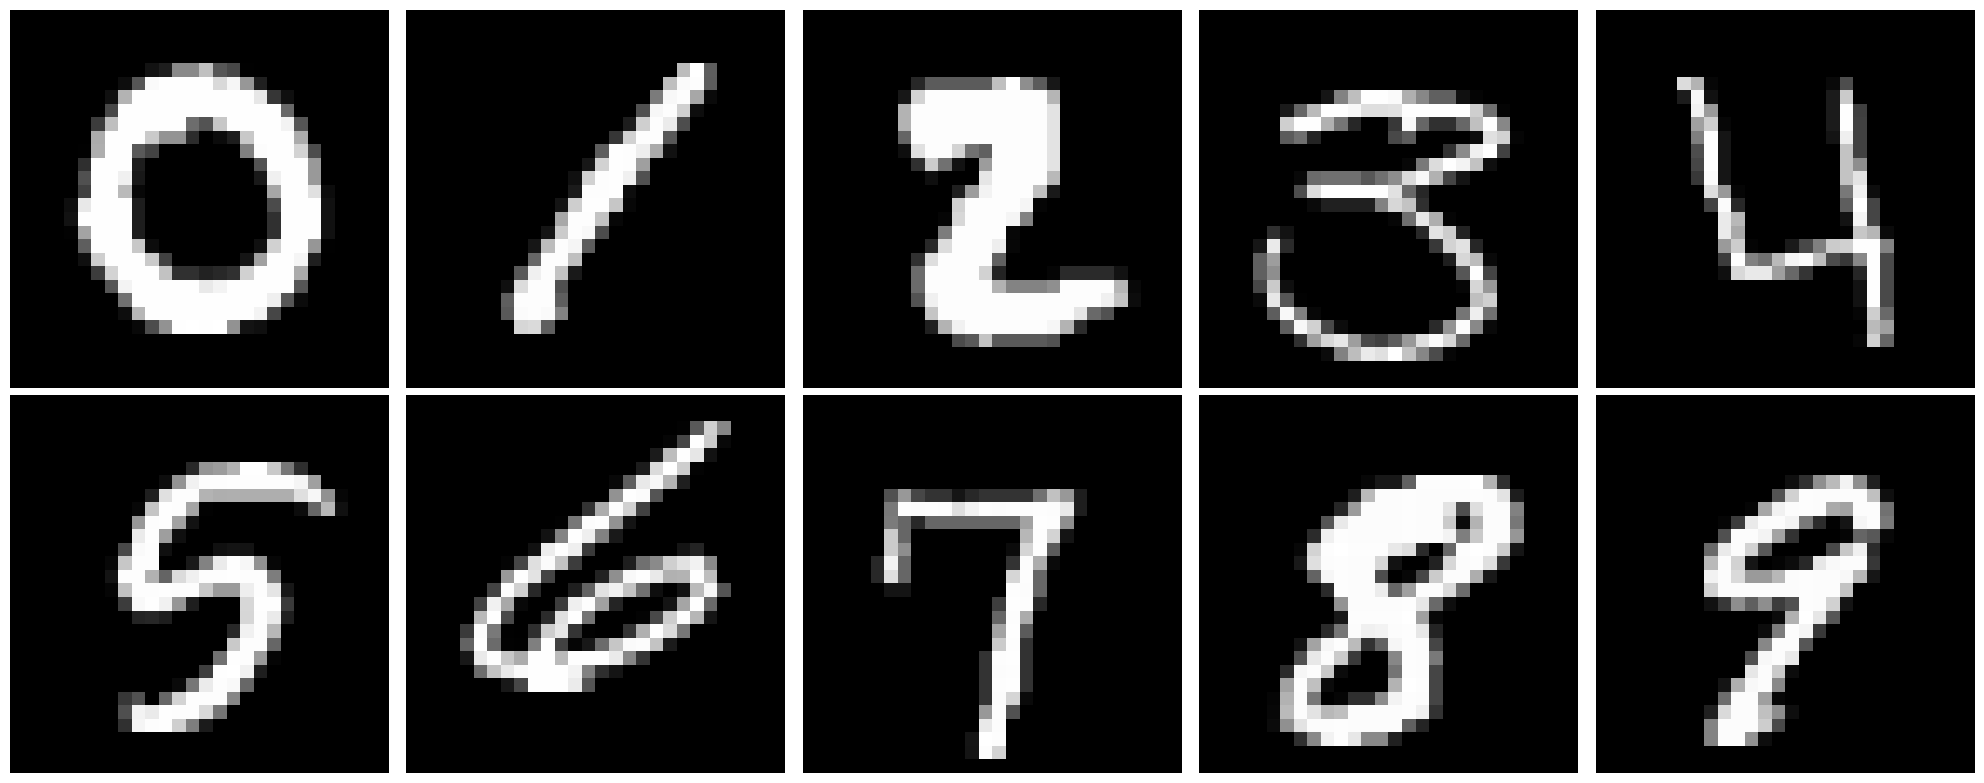

In [37]:
first_indices = y_train.groupby(y_train).idxmin()

fig, ax = plt.subplots(2, 5, figsize=(20,8))
ax = ax.flatten()

for i, index in enumerate(first_indices):
    number = x_train.iloc[index].values.reshape(28,28)
    ax[i].imshow(number, cmap="gray")
    ax[i].axis("off")
    
plt.tight_layout()
plt.show()
    

In [38]:
mas = MaxAbsScaler()
x_train = mas.fit_transform(x_train)

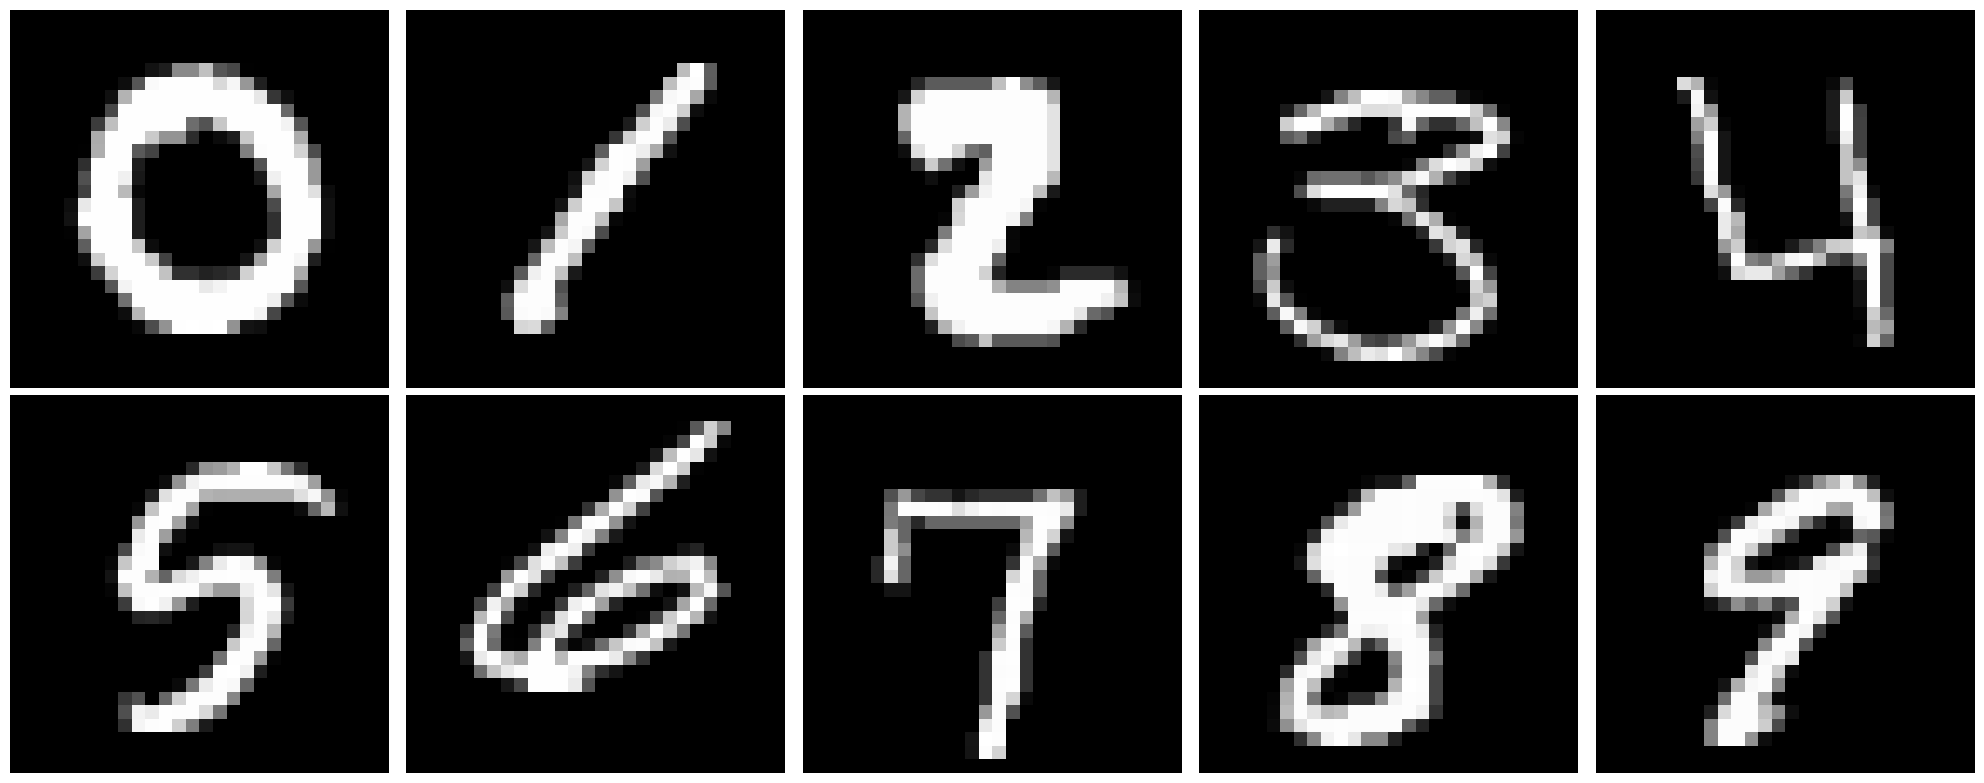

In [39]:
first_indices = y_train.groupby(y_train).idxmin()

fig, ax = plt.subplots(2, 5, figsize=(20,8))
ax = ax.flatten()

for i, index in enumerate(first_indices):
    number = x_train[index].reshape(28,28)
    ax[i].imshow(number, cmap="gray")
    ax[i].axis("off")
    
plt.tight_layout()
plt.show()

In [40]:
y_train = to_categorical(y_train, num_classes=10)

In [41]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

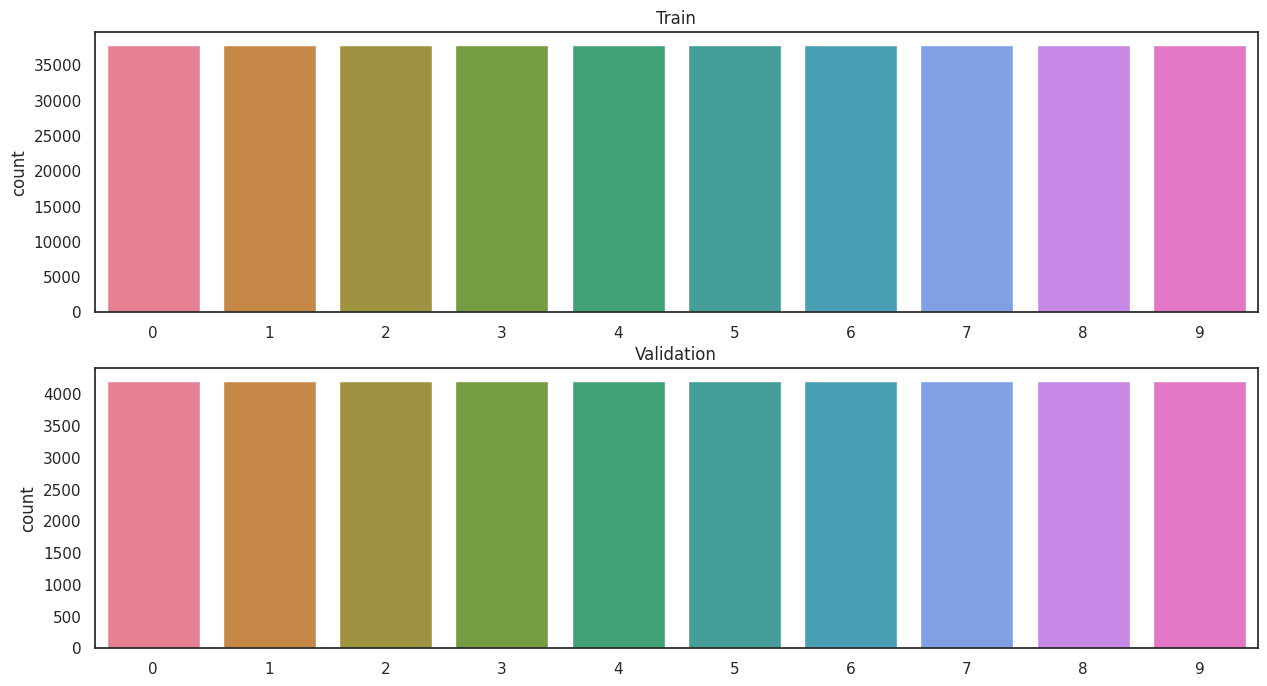

In [42]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
ax = ax.flatten()
sns.countplot(y_train, ax=ax[0])
ax[0].set_title("Train")
sns.countplot(y_val, ax=ax[1])
ax[1].set_title("Validation")
plt.show()

In [43]:
print(x_train.shape)

(37800, 784)


In [44]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_val = x_val.reshape((len(x_val), 28, 28, 1))

model = Sequential([
    # Convolutional and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten layer to transition from convolutional to dense layers
    layers.Flatten(),
    
    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes for classification
])


optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])


In [45]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [53]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [54]:
logs = model.fit(datagen.flow(x_train, y_train, batch_size=86),
                 epochs=1, validation_data=(x_val, y_val),  # Use y_val for labels
                 verbose=2, steps_per_epoch=x_train.shape[0] // 86)


ValueError: in user code:

    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 28, 28, 1) and (None, 10) are incompatible


In [ ]:
# logs = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1182/1182 [==============================] - 8s 7ms/step - loss: 0.1893 - accuracy: 0.9402 - val_loss: 0.0865 - val_accuracy: 0.9707
Epoch 2/30
1182/1182 [==============================] - 8s 7ms/step - loss: 0.0576 - accuracy: 0.9817 - val_loss: 0.0708 - val_accuracy: 0.9779
Epoch 3/30
1182/1182 [==============================] - 8s 6ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0349 - val_accuracy: 0.9883
Epoch 4/30
1182/1182 [==============================] - 8s 6ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 5/30
1182/1182 [==============================] - 8s 6ms/step - loss: 0.0256 - accuracy: 0.9913 - val_loss: 0.0372 - val_accuracy: 0.9881
Epoch 6/30
1182/1182 [==============================] - 8s 6ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0405 - val_accuracy: 0.9864
Epoch 7/30
1182/1182 [==============================] - 8s 6ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0387 - val_accuracy:

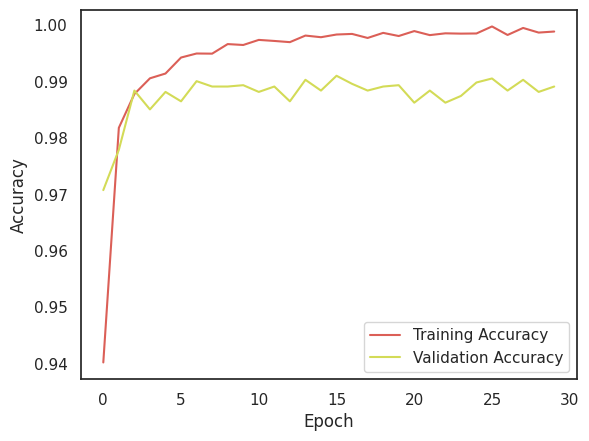

In [ ]:
plt.plot(logs.history['accuracy'], label='Training Accuracy')
plt.plot(logs.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save("digit_model.keras")

In [ ]:
loaded_model = load_model("digit_model.keras")
predictions = loaded_model.predict(x_val)

accuracy = (np.argmax(predictions, axis=1) == np.argmax(y_val, axis=1)).mean()
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

132/132 [==============================] - 0s 2ms/step
Validation Accuracy: 98.90%


In [ ]:
print(x_train[0].shape)

(28, 28, 1)


In [ ]:
single_image = x_val[10].reshape((1, 28, 28, 1))

In [ ]:
predictions = loaded_model.predict(single_image)

1/1 [==============================] - 0s 13ms/step


In [ ]:
np.argmax(predictions)

8

In [ ]:
y_val[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)